In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

import os

### Merge the 12 Months of sales data into single CSV file

In [2]:
#files = [file for file in os.listdir('SalesDate/')]

#all_months_data = pd.DataFrame()

#for file in files:
    #df = pd.read_csv("SalesDate/"+file)
    #all_months_data = pd.concat([all_months_data,df])
    
#all_months_data.to_csv("all_data.csv",index=False)


### Read updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Cleaning data

In [4]:
all_data.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


#### Add to col Month col and MonthName col

In [5]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### change the data type of Quantity Ordered	& Price Each	

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

#### Add tow col Month col and MonthName col

In [7]:
dates = pd.to_datetime(all_data['Order Date'])
all_data['Month'] = dates.dt.month
all_data['Quarter'] =  dates.dt.quarter

#### change data type of Order Date	

In [8]:
all_data['MonthName'] = dates.dt.month_name(locale = 'English')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quarter,MonthName
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,April
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2,April
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,April
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,April
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2,April


#### Add sales col

In [9]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')
all_data.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quarter,MonthName,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,April,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2,April,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,April,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,April,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2,April,11.99


### What was the best month for sales ? How much was earned that month?

In [10]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Quarter,Sales
Month,,,,
1,10903,1811768.38,9709,1822256.73
2,13449,2188884.72,11975,2202022.42
3,17005,2791207.83,15153,2807100.38
4,20558,3367671.02,36558,3390670.24
5,18667,3135125.13,33132,3152606.75
6,15253,2562025.61,27108,2577802.26
7,16072,2632539.56,42879,2647775.76
8,13448,2230345.42,35883,2244467.88
9,13109,2084992.09,34863,2097560.13


In [11]:
all_data.groupby('Month').sum().max()

Quantity Ordered      28114.00
Price Each          4588415.41
Quarter               99936.00
Sales               4613443.34
dtype: float64

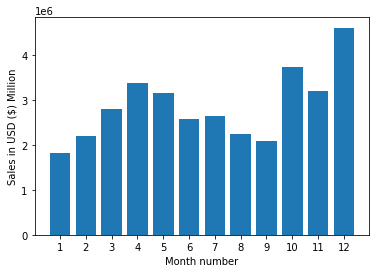

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)


plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($) Million')
plt.xlabel('Month number')
plt.show()

In [13]:
quartes_sales= all_data.groupby(['Quarter']).sum()['Sales']
quartes_sales

Quarter
1     6831379.53
2     9121079.25
3     6989803.77
4    11549773.42
Name: Sales, dtype: float64

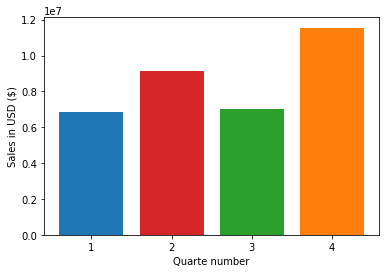

In [14]:
quartes = range(1,5)

bar_colors = [ 'tab:blue', 'tab:red','tab:green', 'tab:orange']

plt.bar(quartes,quartes_sales,color=bar_colors)
plt.xticks(quartes)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Quarte number')
plt.show()


### What city sold the most product?

#### Add city col

In [15]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Quarter,MonthName,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,2,April,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,2,April,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,April,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,2,April,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,2,April,11.99,Los Angeles (CA)


In [16]:
all_data.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Quarter,Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,39808,2795498.58
Austin (TX),11153,1809873.61,69829,26508,1819581.75
Boston (MA),22528,3637409.77,141112,53576,3661642.01
Dallas (TX),16730,2752627.82,104620,39703,2767975.40
Los Angeles (CA),33289,5421435.23,208325,79190,5452570.80
New York City (NY),27932,4635370.83,175741,66753,4664317.43
Portland (ME),2750,447189.25,17144,6523,449758.27
Portland (OR),11303,1860558.22,70621,26837,1870732.34
San Francisco (CA),50239,8211461.74,315520,119896,8262203.91


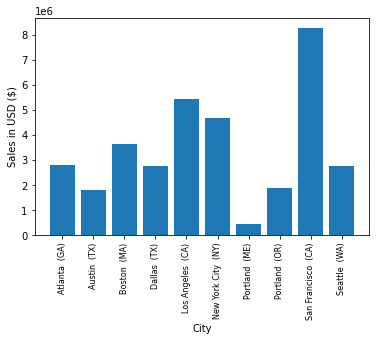

In [17]:
cities = [city for city, df in all_data.groupby(['City'])]

plt.bar(cities,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(cities, rotation='vertical', size=8)
plt.show()

#### Calculate Percentage of Total For each City

In [18]:
all_data['percent'] = (all_data['Sales'] /all_data['Sales'].sum()) * 100
all_data.groupby(['City']).sum()['percent']#### Add city col

City
Atlanta  (GA)           8.104765
Austin  (TX)            5.275368
Boston  (MA)           10.615906
Dallas  (TX)            8.024970
Los Angeles  (CA)      15.808202
New York City  (NY)    13.522882
Portland  (ME)          1.303948
Portland  (OR)          5.423665
San Francisco  (CA)    23.953947
Seattle  (WA)           7.966348
Name: percent, dtype: float64

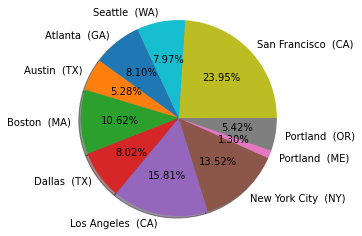

In [19]:
fig1, ax1 = plt.subplots()
ax1.pie(all_data.groupby(['City']).sum()['percent'], labels=cities, autopct='%1.2f%%',
        shadow=True, startangle=115)
ax1.axis('equal')  

plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product?


In [20]:
all_data['Hour'] = dates.dt.hour
all_data['Minute'] = dates.dt.minute
all_data['Count'] = 1


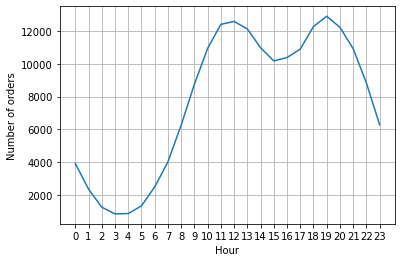

In [21]:
hours = [hours for hours, df in all_data.groupby(['Hour'])]

plt.plot(hours, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.ylabel('Number of orders')
plt.xlabel('Hour')
plt.grid()
plt.show()

### What products are most often sold together?

In [22]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\frnsa\AppData\Local\Temp/ipykernel_9808/2275315762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### What product sold the most? Why do you think it sold the most?


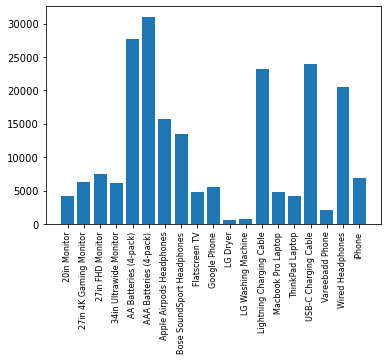

In [24]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\frnsa\AppData\Local\Temp/ipykernel_9808/244484573.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\frnsa\AppData\Local\Temp/ipykernel_9808/244484573.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


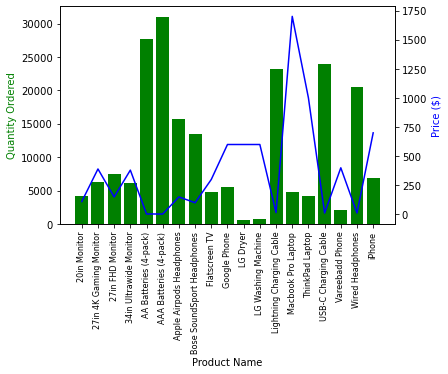

In [25]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()